# Análise de Sentimentos

## Libraries

In [35]:
# Basic Imports
#import tweepy
import pandas as pd     
import numpy as np 
import time
import os
import re

# TextBlob Imports
from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# NLTK Imports
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# ------------------ Wordcloud ---------------------------

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from spacy.lang.pt import Portuguese
#from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Import NLTK Text Processing Libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize
from nltk.probability import FreqDist


from IPython.core.display import HTML

## Dataset

## Training Model

In [36]:

! python -m textblob.download_corpora
! pip install langdetect
! pip install unidecode


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


## Atualizar Dataset

## Open Dataset

In [38]:
from unidecode import unidecode
dataset = pd.read_excel('/content/sample_data/Reclamações.xlsx')
novacoluna = []
for texto in dataset['teor_reclamacao']:
  texto = str(texto).lower()
  texto = unidecode(texto)
  novacoluna.append(texto)
dataset['teor_reclamacao'] = novacoluna

## Frequência e WordCloud

In [39]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    | 

True

## Análise de Sentimento

In [41]:
#Sentiment Analysis in Português and English

base_path = 'ReLi-Lex'
train = []
wordsPT = []
wordsPT_sentiments = []

files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

for file in files:
    t = 1 if '_Positivos' in file else -1
    with open(file, 'r', encoding = 'latin-1') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            wordsPT.append((w[1:-1]))
            wordsPT_sentiments.append(t)
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

In [42]:
print(train)

[('adorar', 1), ('agradar', 1), ('amadurecer', 1), ('amar', 1), ('animar', 1), ('apaixonar', 1), ('apegar', 1), ('apreciar', 1), ('aprender', 1), ('arrebatar', 1), ('arrebentar', 1), ('atrair', 1), ('cativar', 1), ('conquistar', 1), ('curtir', 1), ('deliciar', 1), ('destacar-se', 1), ('divertir', 1), ('emocionar', 1), ('emplacar', 1), ('empolgar', 1), ('encantar', 1), ('enternecer', 1), ('entreter', 1), ('facilitar', 1), ('fascinar', 1), ('fluir', 1), ('gostar', 1), ('identificar', 1), ('impressionar', 1), ('inovar', 1), ('recomendar', 1), ('sensibilizar', 1), ('simpatizar', 1), ('valorizar', 1), ('vibrar', 1), ('viciar', 1), ('apavorar', 1), ('brilhar', 1), ('comover', 1), ('devorar', 1), ('prender', 1), ('rir', 1), ('saborear', 1), ('surpreender', 1), ('tocar', 1), ('anticlímax', -1), ('besteira', -1), ('bobagem', -1), ('boçal', -1), ('bosta', -1), ('ignorante', -1), ('chatice', -1), ('clichê', -1), ('decepção', -1), ('defeito', -1), ('demorar', -1), ('desastre', -1), ('desconforto',

In [43]:
def clean_tweet(text):
    text = text.lower()
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [44]:
print(cl)

<NaiveBayesClassifier trained on 732 instances>


In [45]:
print(clean_tweet(input("")))

Oinhe miaor
oinhe miaor


## Sentiment Analysis with TextBlob 

In [46]:
def sentiment(tweet):
    global blob
    polarity = 0
    
    blob = TextBlob(tweet, classifier=cl)
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

In [47]:
def analize_sentimentEN(text):

    global count_eng
    count_eng = 0
    analysis = TextBlob(text)
    
    if analysis.detect_language() != 'en':
        count_eng += 1
        analysis = TextBlob(str(analysis.translate(to='en')))
        time.sleep(0.5)    
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [48]:
def detector(text):

  text = clean_tweet(text)
  return detect(text)

In [49]:
from langdetect import detect
dataset['SA TextBlob'] = np.array([ sentiment(text) for text in dataset['teor_reclamacao'] ])
dataset['Language'] = np.array([ detector(text) for text in dataset['teor_reclamacao'] ])
dataset.to_excel('Analize de Sentimentos.xlsx')

In [50]:
print(dataset['SA TextBlob'])
print(dataset['Language'])

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1781    1
1782    1
1783    1
1784    1
1785    1
Name: SA TextBlob, Length: 1786, dtype: int64
0       en
1       pt
2       pt
3       pt
4       pt
        ..
1781    tl
1782    tl
1783    tl
1784    tl
1785    tl
Name: Language, Length: 1786, dtype: object


In [52]:
print(dataset['teor_reclamacao'][1781])

nan


In [ ]:
print(sentiment(input("")))

In [53]:
#single pred
detector(input(" "))

 Não estou gostando tanto disso


'pt'

## Results of Sentiment Analysis

In [ ]:
#Sentiment Analysis Results
pos_texts = [ text for index, text in enumerate(dataset['teor_reclamacao']) if dataset['SA TextBlob'][index] > 0]
neg_texts = [ text for index, text in enumerate(dataset['teor_reclamacao']) if dataset['SA TextBlob'][index] < 0]

In [ ]:
print("Porcentagem de Tweets Positivos: {}%".format(len(pos_texts)*100/len(dataset['teor_reclamacao'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(neg_texts)*100/len(dataset['teor_reclamacao'])))

Porcentagem de Tweets Positivos: 9.483960948396096%
Porcentagem de Tweets Negativos: 90.51603905160391%


In [ ]:
sentiments = ['Positivos', 'Negativos']
percents = [len(pos_texts), len(neg_texts)]

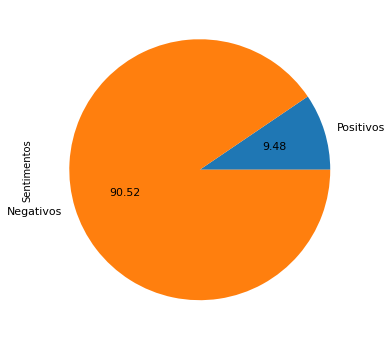

In [ ]:
pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));